<a href="https://colab.research.google.com/github/usshaa/BK_Birla/blob/main/Task_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Task 3: End-to-End Classification Techniques – Implementing and Evaluating Classifiers

In [54]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [59]:
# STEP 2: Load Dataset - Titanic
titanic = sns.load_dataset('titanic')
df = titanic.copy()

In [60]:
# STEP 3: EDA (Exploratory Data Analysis)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [63]:
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


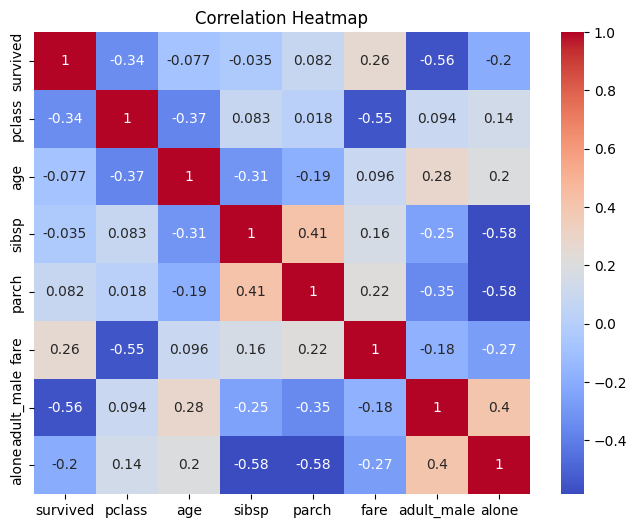

In [64]:
# Visualization - Correlation and Class Distributions
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

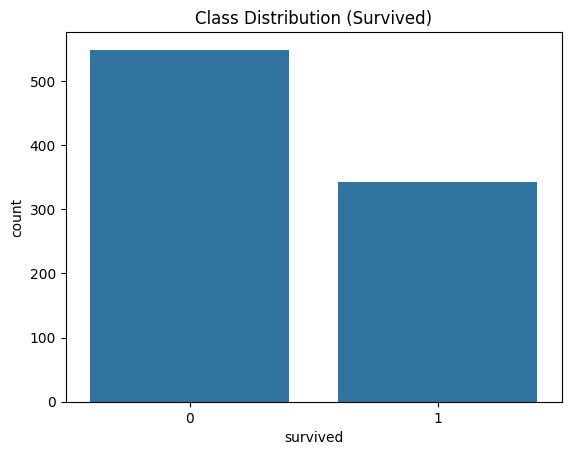

In [65]:
sns.countplot(data=df, x='survived')
plt.title("Class Distribution (Survived)")
plt.show()

In [66]:
# STEP 4: Data Preprocessing
df = df.drop(['deck', 'embark_town', 'alive'], axis=1)  # Drop high-missing columns
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['who'] = LabelEncoder().fit_transform(df['who'])
df['class'] = LabelEncoder().fit_transform(df['class'])
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)

In [67]:
# Features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [68]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# STEP 5: Classifier Implementation
lrm = LogisticRegression()
knnm = KNeighborsClassifier()
dtm = DecisionTreeClassifier()
rfm = RandomForestClassifier()
svcm = SVC(probability=True)
nvm =  GaussianNB()

In [71]:
# Train the model

In [72]:
lrm.fit(X_train, y_train)

LogisticRegression()

In [73]:
knnm.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
dtm.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
rfm.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
svcm.fit(X_train, y_train)

SVC(probability=True)

In [77]:
nvm.fit(X_train, y_train)

GaussianNB()

In [78]:
# Classification with test data

In [80]:
# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    plt.figure(figsize=(4, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
    plt.title("Confusion Matrix")
    plt.show()
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(4, 2))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    # Return evaluation metrics
    return acc, prec, rec, f1, roc_auc # Added return statement to return evaluation metrics

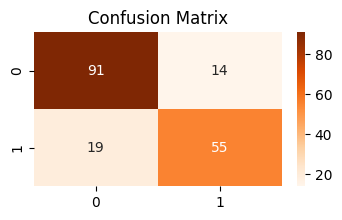

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



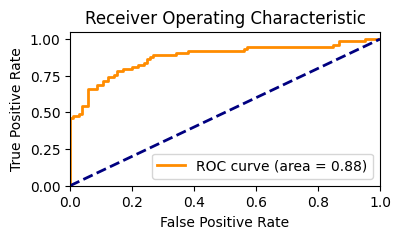

(0.8156424581005587,
 0.7971014492753623,
 0.7432432432432432,
 0.7692307692307693,
 np.float64(0.8781209781209782))

In [81]:
lrm_eval = evaluate_model(lrm, X_test, y_test)
lrm_eval

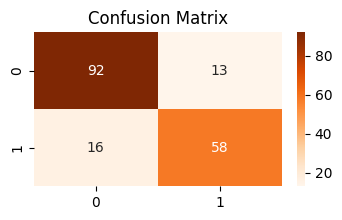

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



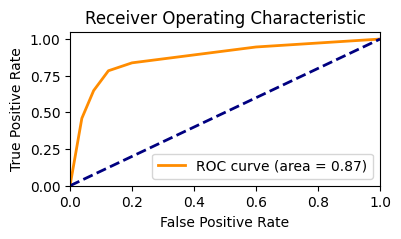

(0.8379888268156425,
 0.8169014084507042,
 0.7837837837837838,
 0.8,
 np.float64(0.8716859716859717))

In [82]:
knnm_eval = evaluate_model(knnm, X_test, y_test)
knnm_eval

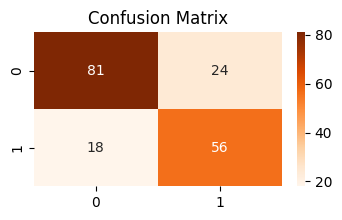

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       105
           1       0.70      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



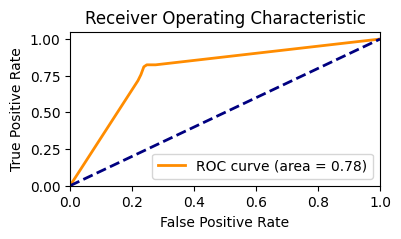

(0.7653631284916201,
 0.7,
 0.7567567567567568,
 0.7272727272727273,
 np.float64(0.7844916344916345))

In [83]:
dtm_eval = evaluate_model(dtm, X_test, y_test)
dtm_eval

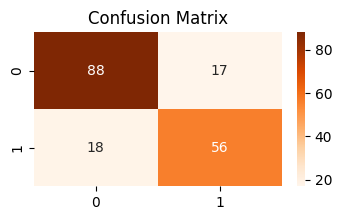

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



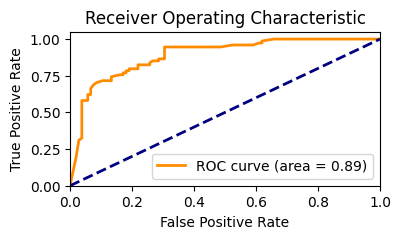

(0.8044692737430168,
 0.7671232876712328,
 0.7567567567567568,
 0.7619047619047619,
 np.float64(0.8893822393822394))

In [84]:
rfm_eval = evaluate_model(rfm, X_test, y_test)
rfm_eval

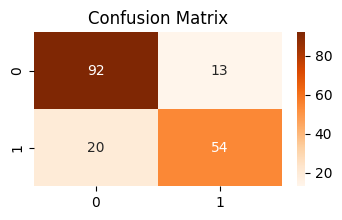

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



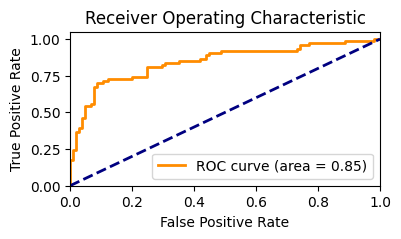

(0.8156424581005587,
 0.8059701492537313,
 0.7297297297297297,
 0.7659574468085106,
 np.float64(0.8462033462033463))

In [85]:
svcm_eval = evaluate_model(svcm, X_test, y_test)
svcm_eval

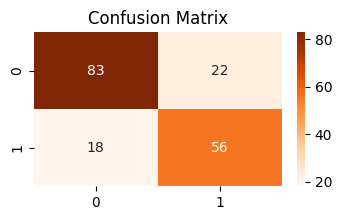

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



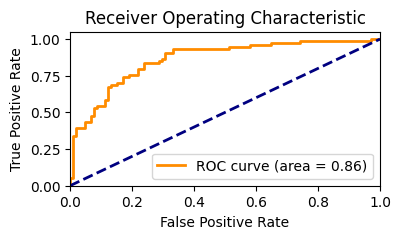

(0.776536312849162,
 0.717948717948718,
 0.7567567567567568,
 0.7368421052631579,
 np.float64(0.8621621621621623))

In [32]:
nvm_eval = evaluate_model(nvm, X_test, y_test)
nvm_eval

In [86]:
# model accracy comparison
df_eval = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes'],
    'Accuracy': [lrm_eval[0], knnm_eval[0], dtm_eval[0], rfm_eval[0], svcm_eval[0], nvm_eval[0]],
    'Precision': [lrm_eval[1], knnm_eval[1], dtm_eval[1], rfm_eval[1], svcm_eval[1], nvm_eval[1]],
    'Recall': [lrm_eval[2], knnm_eval[2], dtm_eval[2], rfm_eval[2], svcm_eval[2], nvm_eval[2]],
    'F1 Score': [lrm_eval[3], knnm_eval[3], dtm_eval[3], rfm_eval[3], svcm_eval[3], nvm_eval[3]],
    'ROC AUC': [lrm_eval[4], knnm_eval[4], dtm_eval[4], rfm_eval[4], svcm_eval[4], nvm_eval[4]]
})

print("\nModel Performance Summary:")
display(df_eval)


Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.815642,0.797101,0.743243,0.769231,0.878121
1,KNN,0.837989,0.816901,0.783784,0.800000,0.871686
2,Decision Tree,0.765363,0.700000,0.756757,0.727273,0.784492
3,Random Forest,0.804469,0.767123,0.756757,0.761905,0.889382
4,SVM,0.815642,0.805970,0.729730,0.765957,0.846203
5,Naive Bayes,0.776536,0.717949,0.756757,0.736842,0.862162


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# STEP 8: Model Tuning with GridSearchCV

In [87]:
# Define parameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
}

In [88]:
tuned_results = []  # Store results for each model

In [90]:
print(f"Tuning {lrm}...")  # Print current model
lrm_grid_search = GridSearchCV(lrm, param_grids["Logistic Regression"], cv=5)
lrm_grid_search.fit(X_train, y_train)

# Store results
tuned_results.append({
    'Model': "Logistic Regression",
    'Best Parameters': lrm_grid_search.best_params_,
    'Best Score': lrm_grid_search.best_score_
})

Tuning LogisticRegression()...


In [91]:
print(f"Tuning {knnm}...")  # Print current model
knn_grid_search = GridSearchCV(knnm, param_grids["KNN"], cv=5)
knn_grid_search.fit(X_train, y_train)

# Store results
tuned_results.append({
    'Model': "KNN",
    'Best Parameters': knn_grid_search.best_params_,
    'Best Score': knn_grid_search.best_score_
})

Tuning KNeighborsClassifier()...


In [92]:
print(f"Tuning {rfm}...")  # Print current model
rfm_grid_search = GridSearchCV(rfm, param_grids["Random Forest"], cv=5)
rfm_grid_search.fit(X_train, y_train)

# Store results
tuned_results.append({
    'Model': "Random Forest",
    'Best Parameters': rfm_grid_search.best_params_,
    'Best Score': rfm_grid_search.best_score_
})

Tuning RandomForestClassifier()...


In [93]:
# Create a DataFrame from the results
tuned_df = pd.DataFrame(tuned_results)

print("\nTuned Model Performance Summary:")
display(tuned_df)


Tuned Model Performance Summary:


,Model,Best Parameters,Best Score
0,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.823008
1,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.823008
2,KNN,"{'n_neighbors': 9, 'weights': 'uniform'}",0.810381
3,Random Forest,"{'max_depth': 10, 'n_estimators': 100}",0.813237
